<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_42_Campus_Recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

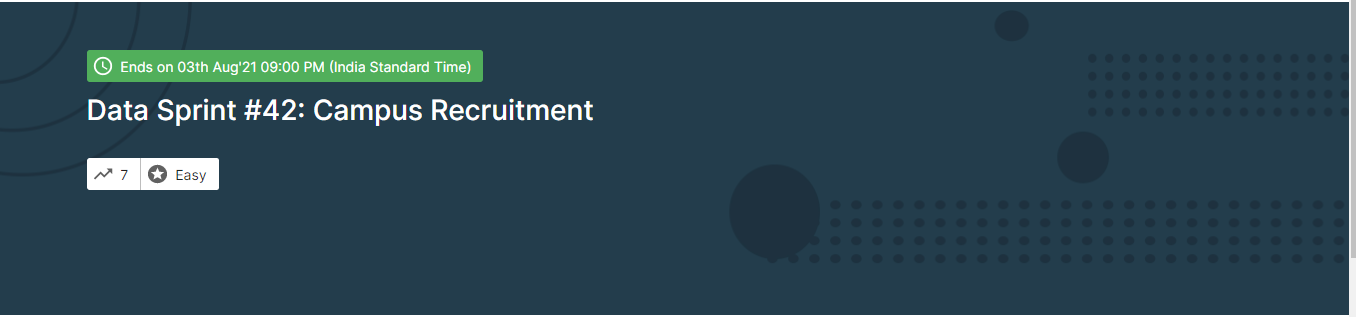

## Problem Statement

A campus recruitment program is a program conducted within universities or other educational institutions that helps students as they near graduation find employment. As part of this program, educational institutions partner with corporations that wish to recruit from student populations.

 

The placement of a student depends on various factors like their performance in school and colleges, work experience, etc. 


 

**The objective here is to predict if a student will get placed or not.**

 

## Evaluation Criteria

 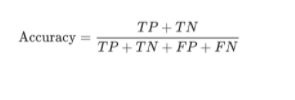

Submissions are evaluated using the Accuracy Score.

## Data Description

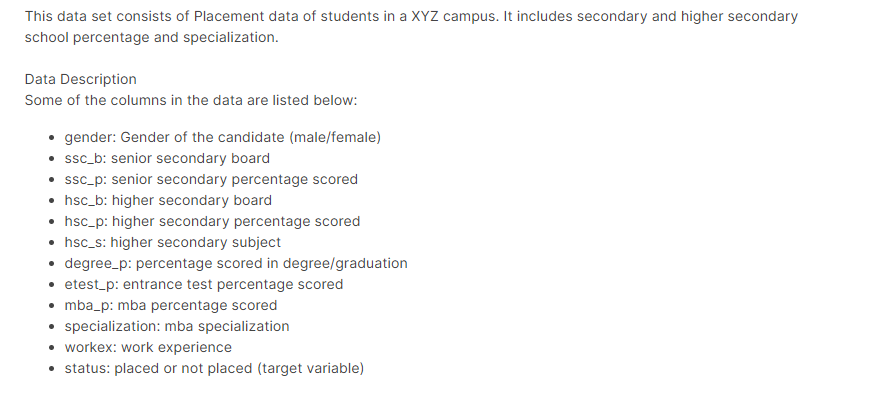

In [1]:
from google.colab import files
files.upload()

Saving Sample_Submission (2).csv to Sample_Submission (2).csv
Saving Test_Data (1).csv to Test_Data (1).csv
Saving Train_Data (2).csv to Train_Data (2).csv


{'Sample_Submission (2).csv': b'prediction\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNot Placed\r\nNo

In [8]:
%%capture
!pip install pandas_profiling -U

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import (
    ensemble,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.metrics import (
    accuracy_score,
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC,
)
from yellowbrick.model_selection import (
    LearningCurve,
)

import warnings
warnings.filterwarnings('ignore')


In [41]:
train = pd.read_csv("/content/Train_Data (2).csv")
test = pd.read_csv("/content/Test_Data (1).csv")
sub = pd.read_csv("/content/Sample_Submission (2).csv")

In [4]:
train.shape,test.shape,sub.shape

((670, 13), (448, 12), (448, 1))

In [4]:
train.head()

gender      ssc_p    ssc_b  ...  specialisation workex      status
0      M  73.976975  Central  ...          Mkt&HR    Yes      Placed
1      M  62.000000   Others  ...          Mkt&HR    Yes      Placed
2      M  80.965242   Others  ...         Mkt&Fin     No      Placed
3      M  52.000000   Others  ...         Mkt&Fin    Yes  Not Placed
4      F  69.000000  Central  ...          Mkt&HR     No  Not Placed

[5 rows x 13 columns]

## Summary Statistics

In [5]:
train.describe(include='all')

gender       ssc_p    ssc_b  ...  specialisation workex  status
count     670  670.000000      670  ...             670    670     670
unique      2         NaN        2  ...               2      2       2
top         M         NaN  Central  ...         Mkt&Fin    Yes  Placed
freq      475         NaN      381  ...             335    344     439
mean      NaN   68.960017      NaN  ...             NaN    NaN     NaN
std       NaN   10.182563      NaN  ...             NaN    NaN     NaN
min       NaN   42.864579      NaN  ...             NaN    NaN     NaN
25%       NaN   61.619318      NaN  ...             NaN    NaN     NaN
50%       NaN   68.332563      NaN  ...             NaN    NaN     NaN
75%       NaN   77.130019      NaN  ...             NaN    NaN     NaN
max       NaN   89.400000      NaN  ...             NaN    NaN     NaN

[11 rows x 13 columns]

In [6]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

* no missing values detected

In [7]:
import pandas_profiling
pandas_profiling.__version__

'3.0.0'

In [8]:
pandas_profiling.ProfileReport(train)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Label Visualization

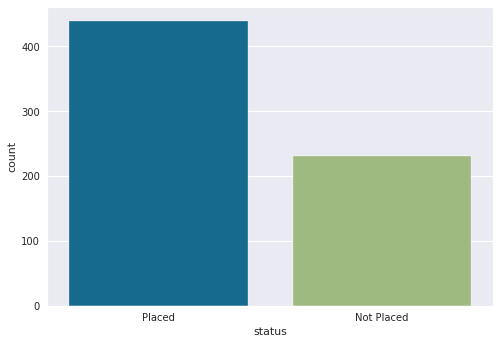

In [12]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(train['status'])


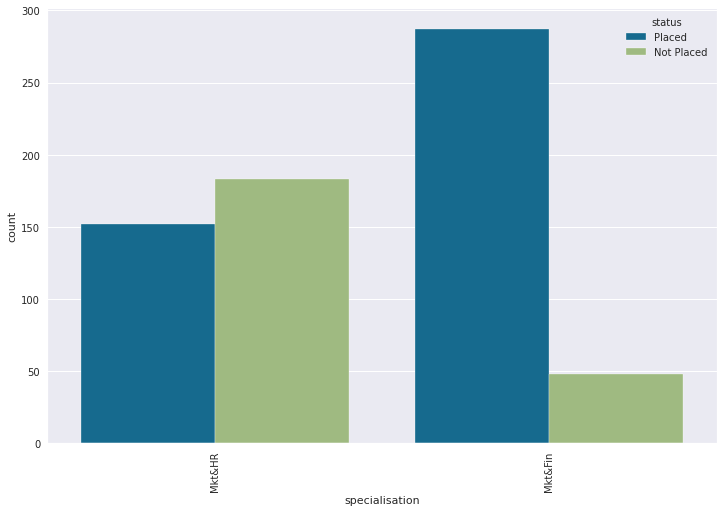

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'specialisation',data=train,hue='status')
plt.show()

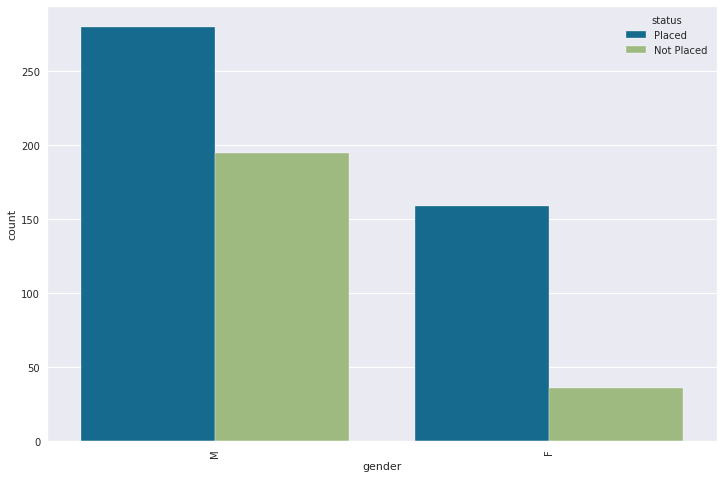

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'gender',data=train,hue='status')
plt.show()

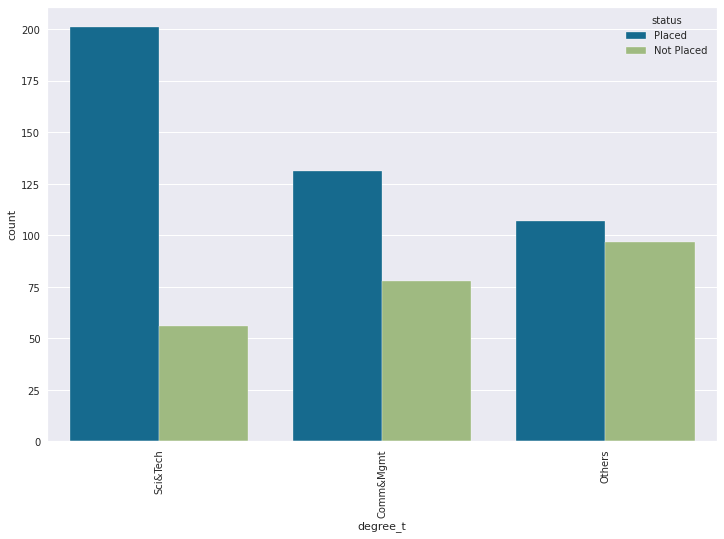

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'degree_t',data=train,hue='status')
plt.show()

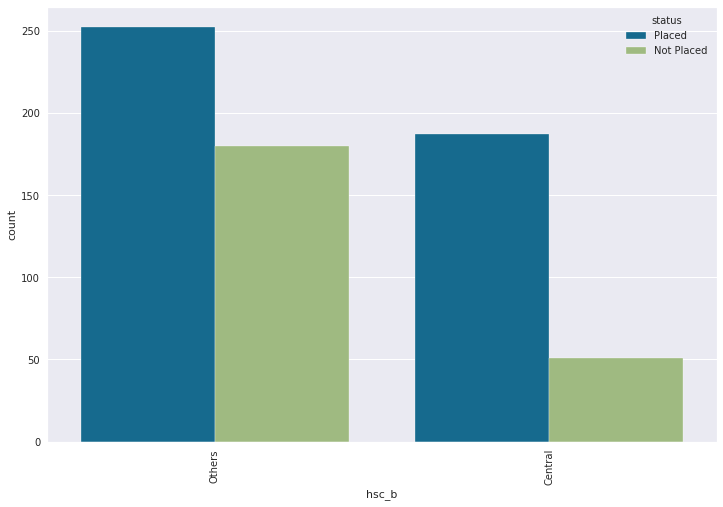

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'hsc_b',data=train,hue='status')
plt.show()

In [5]:
features = train.drop('status',axis=1)
label = train['status']

In [6]:
cat_cols = [ col for col in features.columns if features[col].dtypes == 'O']
cat_cols

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation', 'workex']

In [7]:
num_cols = [col for col in features.columns if col not in cat_cols]

In [8]:
num_cols 

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

## import required libraries

In [9]:
!pip install catboost

     |████████████████████████████████| 69.2 MB 7.7 kB/s 


In [10]:
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import (
    LogisticRegression,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import (
    KNeighborsClassifier,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
)
from  xgboost import XGBClassifier
from catboost import CatBoostClassifier


Running 1 iteration
0.9894466403162056
0.9807116989450482
Running 2 iteration
0.9828063241106719
0.988033380569989
Running 3 iteration
0.9910671936758892
0.9831128956069911
Running 4 iteration
0.9817391304347827
0.9833884427649189
Running 5 iteration
0.9847826086956523
0.9876003778932452
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.9807116989450482 0.9910671936758892 0.9852688693013395


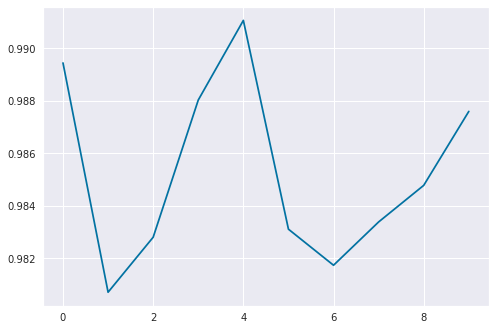

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
iterations = 5
scores = []
scores_val = []
target = label
temp = features
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
        model = CatBoostClassifier(max_depth=3,
                                   random_state=60,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=2000,verbose=0)
        model.fit(xtrain,ytrain,cat_features = cat_cols)
            
        preds = model.predict_proba(xtest)[:,1]
        
        print(roc_auc_score(ytest,preds))
        scores.append(roc_auc_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))


## Train Test Split

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(features,label,test_size=0.10,stratify=label,random_state=42)

In [24]:
model = CatBoostClassifier(max_depth=3,
                                   random_state=60,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1000,verbose=0)
model.fit(X_train,Y_train,cat_features = cat_cols)

In [25]:
Y_pred = model.predict(X_test)

In [26]:
accuracy_score(Y_test,Y_pred)

0.9253731343283582

In [29]:
X_test['Predictions'] = Y_pred

In [30]:
X_test['Actual'] = Y_test

In [32]:
X_test[X_test['Predictions'] =='Placed']['Actual'].unique()

array(['Placed', 'Not Placed'], dtype=object)

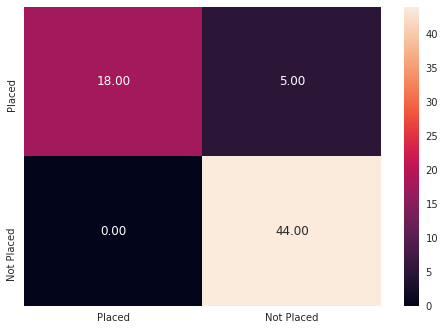

In [33]:
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt=".2f",xticklabels=['Placed','Not Placed'],yticklabels=['Placed','Not Placed'])

## Final training 

In [38]:
model = CatBoostClassifier(max_depth=3,
                                   random_state=60,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1000,verbose=0)
model.fit(features,label,cat_features = cat_cols)

In [42]:
test.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
etest_p           0
mba_p             0
degree_t          0
workex            0
specialisation    0
dtype: int64

In [39]:
test.head()

gender      ssc_p    ssc_b  ...   degree_t workex specialisation
0      M  73.163372  Central  ...  Comm&Mgmt    Yes        Mkt&Fin
1      M  74.000000  Central  ...  Comm&Mgmt    Yes        Mkt&Fin
2      M  85.613691  Central  ...   Sci&Tech    Yes         Mkt&HR
3      M  77.909979   Others  ...   Sci&Tech    Yes        Mkt&Fin
4      M  80.851350   Others  ...   Sci&Tech    Yes        Mkt&Fin

[5 rows x 12 columns]

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          448 non-null    object 
 1   ssc_p           448 non-null    float64
 2   ssc_b           448 non-null    object 
 3   hsc_p           448 non-null    float64
 4   hsc_b           448 non-null    object 
 5   hsc_s           448 non-null    object 
 6   degree_p        448 non-null    float64
 7   etest_p         448 non-null    float64
 8   mba_p           448 non-null    float64
 9   degree_t        448 non-null    object 
 10  workex          448 non-null    object 
 11  specialisation  448 non-null    object 
dtypes: float64(5), object(7)
memory usage: 42.1+ KB


In [47]:
test = test[features.columns.tolist()]

In [48]:
test.head()

gender      ssc_p    ssc_b  ...      mba_p specialisation workex
0      M  73.163372  Central  ...  58.235587        Mkt&Fin    Yes
1      M  74.000000  Central  ...  57.240000        Mkt&Fin    Yes
2      M  85.613691  Central  ...  60.635396         Mkt&HR    Yes
3      M  77.909979   Others  ...  64.304440        Mkt&Fin    Yes
4      M  80.851350   Others  ...  68.660478        Mkt&Fin    Yes

[5 rows x 12 columns]

In [49]:
predictions = model.predict(test)

In [50]:
sub.head()

prediction
0  Not Placed
1  Not Placed
2  Not Placed
3  Not Placed
4  Not Placed

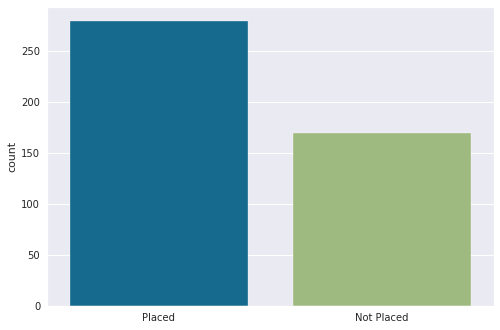

In [52]:
sns.countplot(predictions)

In [53]:
sub.head()

prediction
0  Not Placed
1  Not Placed
2  Not Placed
3  Not Placed
4  Not Placed

In [55]:
test['prediction'] = predictions

In [56]:
test.head()

gender      ssc_p    ssc_b  ...  specialisation workex prediction
0      M  73.163372  Central  ...         Mkt&Fin    Yes     Placed
1      M  74.000000  Central  ...         Mkt&Fin    Yes     Placed
2      M  85.613691  Central  ...          Mkt&HR    Yes     Placed
3      M  77.909979   Others  ...         Mkt&Fin    Yes     Placed
4      M  80.851350   Others  ...         Mkt&Fin    Yes     Placed

[5 rows x 13 columns]

In [57]:
test[['prediction']].to_csv('catboost_predictions.csv',index=False)

**Submission successful! Your score is 93.97321428571429.**